In [53]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(5)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from numpy import array

In [54]:
data = pd.read_csv("../data/BNB.csv")
data

,DateTime,BNBL
0,2020-04-23 06:34:02,28
1,2020-04-23 09:34:02,28
2,2020-04-24 06:34:01,28
3,2020-04-24 09:34:02,28
4,2020-04-27 06:33:57,28
...,...,...
2496,2022-07-14 03:55:56,33
2497,2022-07-14 04:55:53,33
2498,2022-07-14 05:55:54,33
2499,2022-07-14 07:55:52,33


In [3]:
#Changing datetime to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime']).dt.date

#renaming the columns
data.rename(columns = {'DateTime':'date','BNBL':'price'}, inplace = True)
data['date'] = pd.to_datetime(data['date'],format = "%Y-%m-%d")
data

,date,price
0,2020-04-23,28
1,2020-04-23,28
2,2020-04-24,28
3,2020-04-24,28
4,2020-04-27,28
...,...,...
2496,2022-07-14,33
2497,2022-07-14,33
2498,2022-07-14,33
2499,2022-07-14,33


In [4]:
data = data.groupby('date').mean()
data

,price
date,
2020-04-23,28.0
2020-04-24,28.0
2020-04-27,28.0
2020-04-28,28.0
2020-04-29,28.0
...,...
2022-07-08,33.0
2022-07-11,33.0
2022-07-12,33.0


In [5]:
data1=data.reset_index()['price']
data1

0      28.0
1      28.0
2      28.0
3      28.0
4      28.0
       ... 
542    33.0
543    33.0
544    33.0
545    33.0
546    33.0
Name: price, Length: 547, dtype: float64

In [6]:
print("Size of the dataset: ",data1.shape)
print("Checking for null values:\n",data1.isnull().sum())
print("Checking Data-type of each column:\n",data1.dtypes)

Size of the dataset:  (547,)
Checking for null values:
 0
Checking Data-type of each column:
 float64


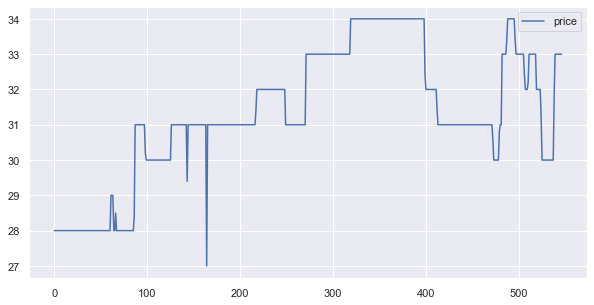

In [7]:
plt.figure(figsize=(10,5))
plt.plot(data1,label='price')
plt.legend()
plt.show()

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [9]:
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [10]:
len(train_data)

355

In [11]:
training_size,test_size

(355, 192)

In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
import numpy
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(344, 10)
(344,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(181, 10)
(181,)


(None, None)

In [16]:
X_train.shape[1]

10

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
model=Sequential()
model.add(GRU(64,activation='relu', return_sequences=False,input_shape=(time_step,1)))
#model.add(GRU(128,activation='relu'))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
#model.summary()

In [19]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,verbose=2)

Epoch 1/200
11/11 - 1s - loss: 0.1863 - val_loss: 0.0243 - 1s/epoch - 118ms/step
Epoch 2/200
11/11 - 0s - loss: 0.0349 - val_loss: 0.0077 - 73ms/epoch - 7ms/step
Epoch 3/200
11/11 - 0s - loss: 0.0129 - val_loss: 0.0121 - 77ms/epoch - 7ms/step
Epoch 4/200
11/11 - 0s - loss: 0.0065 - val_loss: 0.0051 - 77ms/epoch - 7ms/step
Epoch 5/200
11/11 - 0s - loss: 0.0049 - val_loss: 0.0044 - 70ms/epoch - 6ms/step
Epoch 6/200
11/11 - 0s - loss: 0.0035 - val_loss: 0.0037 - 62ms/epoch - 6ms/step
Epoch 7/200
11/11 - 0s - loss: 0.0029 - val_loss: 0.0036 - 66ms/epoch - 6ms/step
Epoch 8/200
11/11 - 0s - loss: 0.0028 - val_loss: 0.0038 - 63ms/epoch - 6ms/step
Epoch 9/200
11/11 - 0s - loss: 0.0027 - val_loss: 0.0036 - 64ms/epoch - 6ms/step
Epoch 10/200
11/11 - 0s - loss: 0.0027 - val_loss: 0.0036 - 67ms/epoch - 6ms/step
Epoch 11/200
11/11 - 0s - loss: 0.0027 - val_loss: 0.0036 - 71ms/epoch - 6ms/step
Epoch 12/200
11/11 - 0s - loss: 0.0027 - val_loss: 0.0036 - 65ms/epoch - 6ms/step
Epoch 13/200
11/11 - 0s -

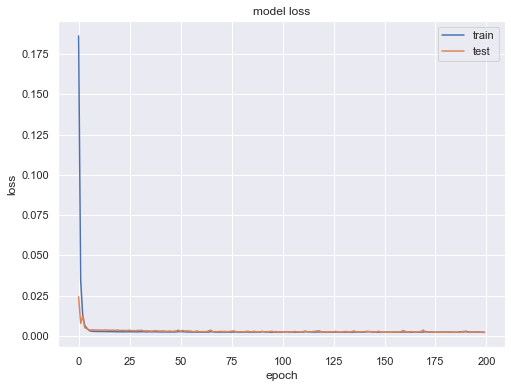

In [20]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [21]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [22]:
rstrain_predict=scaler.inverse_transform(train_predict)
rstest_predict=scaler.inverse_transform(test_predict)
rsytest=scaler.inverse_transform(np.array(ytest).reshape(-1,1))
rsytrain=scaler.inverse_transform(np.array(y_train).reshape(-1,1))

In [23]:
RMSE_train=math.sqrt(mean_squared_error(rsytrain,rstrain_predict))
print(RMSE_train)

0.32827735865086266


In [24]:
RMSE_test=math.sqrt(mean_squared_error(rsytest,rstest_predict))
MAE_test=mean_absolute_error(rsytest,rstest_predict)
R2_test=r2_score(rsytest,rstest_predict)
print("RMSE:", RMSE_test)
print("MAE:", MAE_test)
print("R-Squared:", R2_test)

RMSE: 0.32041223229969407
MAE: 0.1111286690221955
R-Squared: 0.9456181272996476


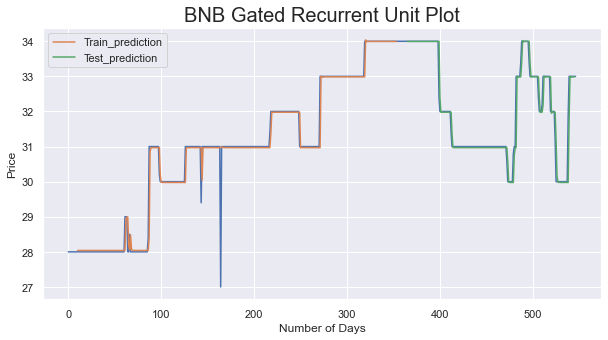

In [25]:
look_back=10
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = rstrain_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = rstest_predict
# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot,label='Train_prediction')
plt.plot(testPredictPlot, label='Test_prediction')
plt.title('BNB Gated Recurrent Unit Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Number of Days')
plt.legend()
plt.show()

In [26]:
len(test_data)

192

In [27]:
x_input=test_data[182:].reshape(1,-1)
x_input.shape

(1, 10)

In [28]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.4285714285714288,
 0.6857142857142859,
 0.8571428571428577,
 0.8571428571428577,
 0.8571428571428577,
 0.8571428571428577,
 0.8571428571428577,
 0.8571428571428577,
 0.8571428571428577,
 0.8571428571428577]

In [29]:
lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

In [30]:
forecast_rescaled=scaler.inverse_transform(lst_output)

In [31]:
forecast_rescaled

array([[32.98752147],
       [32.97431523],
       [32.96102011],
       [32.94764197],
       [32.93415409],
       [32.92054731],
       [32.90681869],
       [32.89296865],
       [32.87899804],
       [32.86490434],
       [32.8506884 ],
       [32.83634812],
       [32.82188433],
       [32.80729496],
       [32.79257959],
       [32.77773654],
       [32.76276332],
       [32.74766117],
       [32.73242718],
       [32.71706176],
       [32.70156366],
       [32.68593121],
       [32.67016149],
       [32.654257  ],
       [32.63821357],
       [32.62203205],
       [32.60570949],
       [32.5892455 ],
       [32.57263964],
       [32.55589151]])

In [32]:
day_new=np.arange(0,547)
day_pred=np.arange(547,577)

In [33]:
forecast = pd.DataFrame(forecast_rescaled, columns = ['predicted_price'])
forecast.head()

,predicted_price
0,32.987521
1,32.974315
2,32.961020
3,32.947642
4,32.934154


In [34]:
data

,price
date,
2020-04-23,28.0
2020-04-24,28.0
2020-04-27,28.0
2020-04-28,28.0
2020-04-29,28.0
...,...
2022-07-08,33.0
2022-07-11,33.0
2022-07-12,33.0


In [35]:
forecast['date'] = pd.date_range(start='2022-07-15', periods=30, freq='D')
forecast.head()

,predicted_price,date
0,32.987521,2022-07-15
1,32.974315,2022-07-16
2,32.961020,2022-07-17
3,32.947642,2022-07-18
4,32.934154,2022-07-19


In [36]:
forecast = forecast.set_index('date')
forecast

,predicted_price
date,
2022-07-15,32.987521
2022-07-16,32.974315
2022-07-17,32.961020
2022-07-18,32.947642
2022-07-19,32.934154
2022-07-20,32.920547
2022-07-21,32.906819
2022-07-22,32.892969
2022-07-23,32.878998


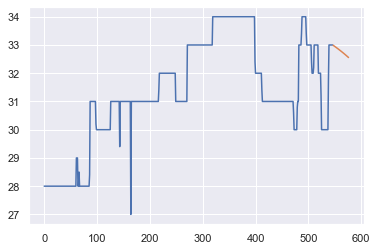

In [37]:
plt.plot(day_new,scaler.inverse_transform(data1))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

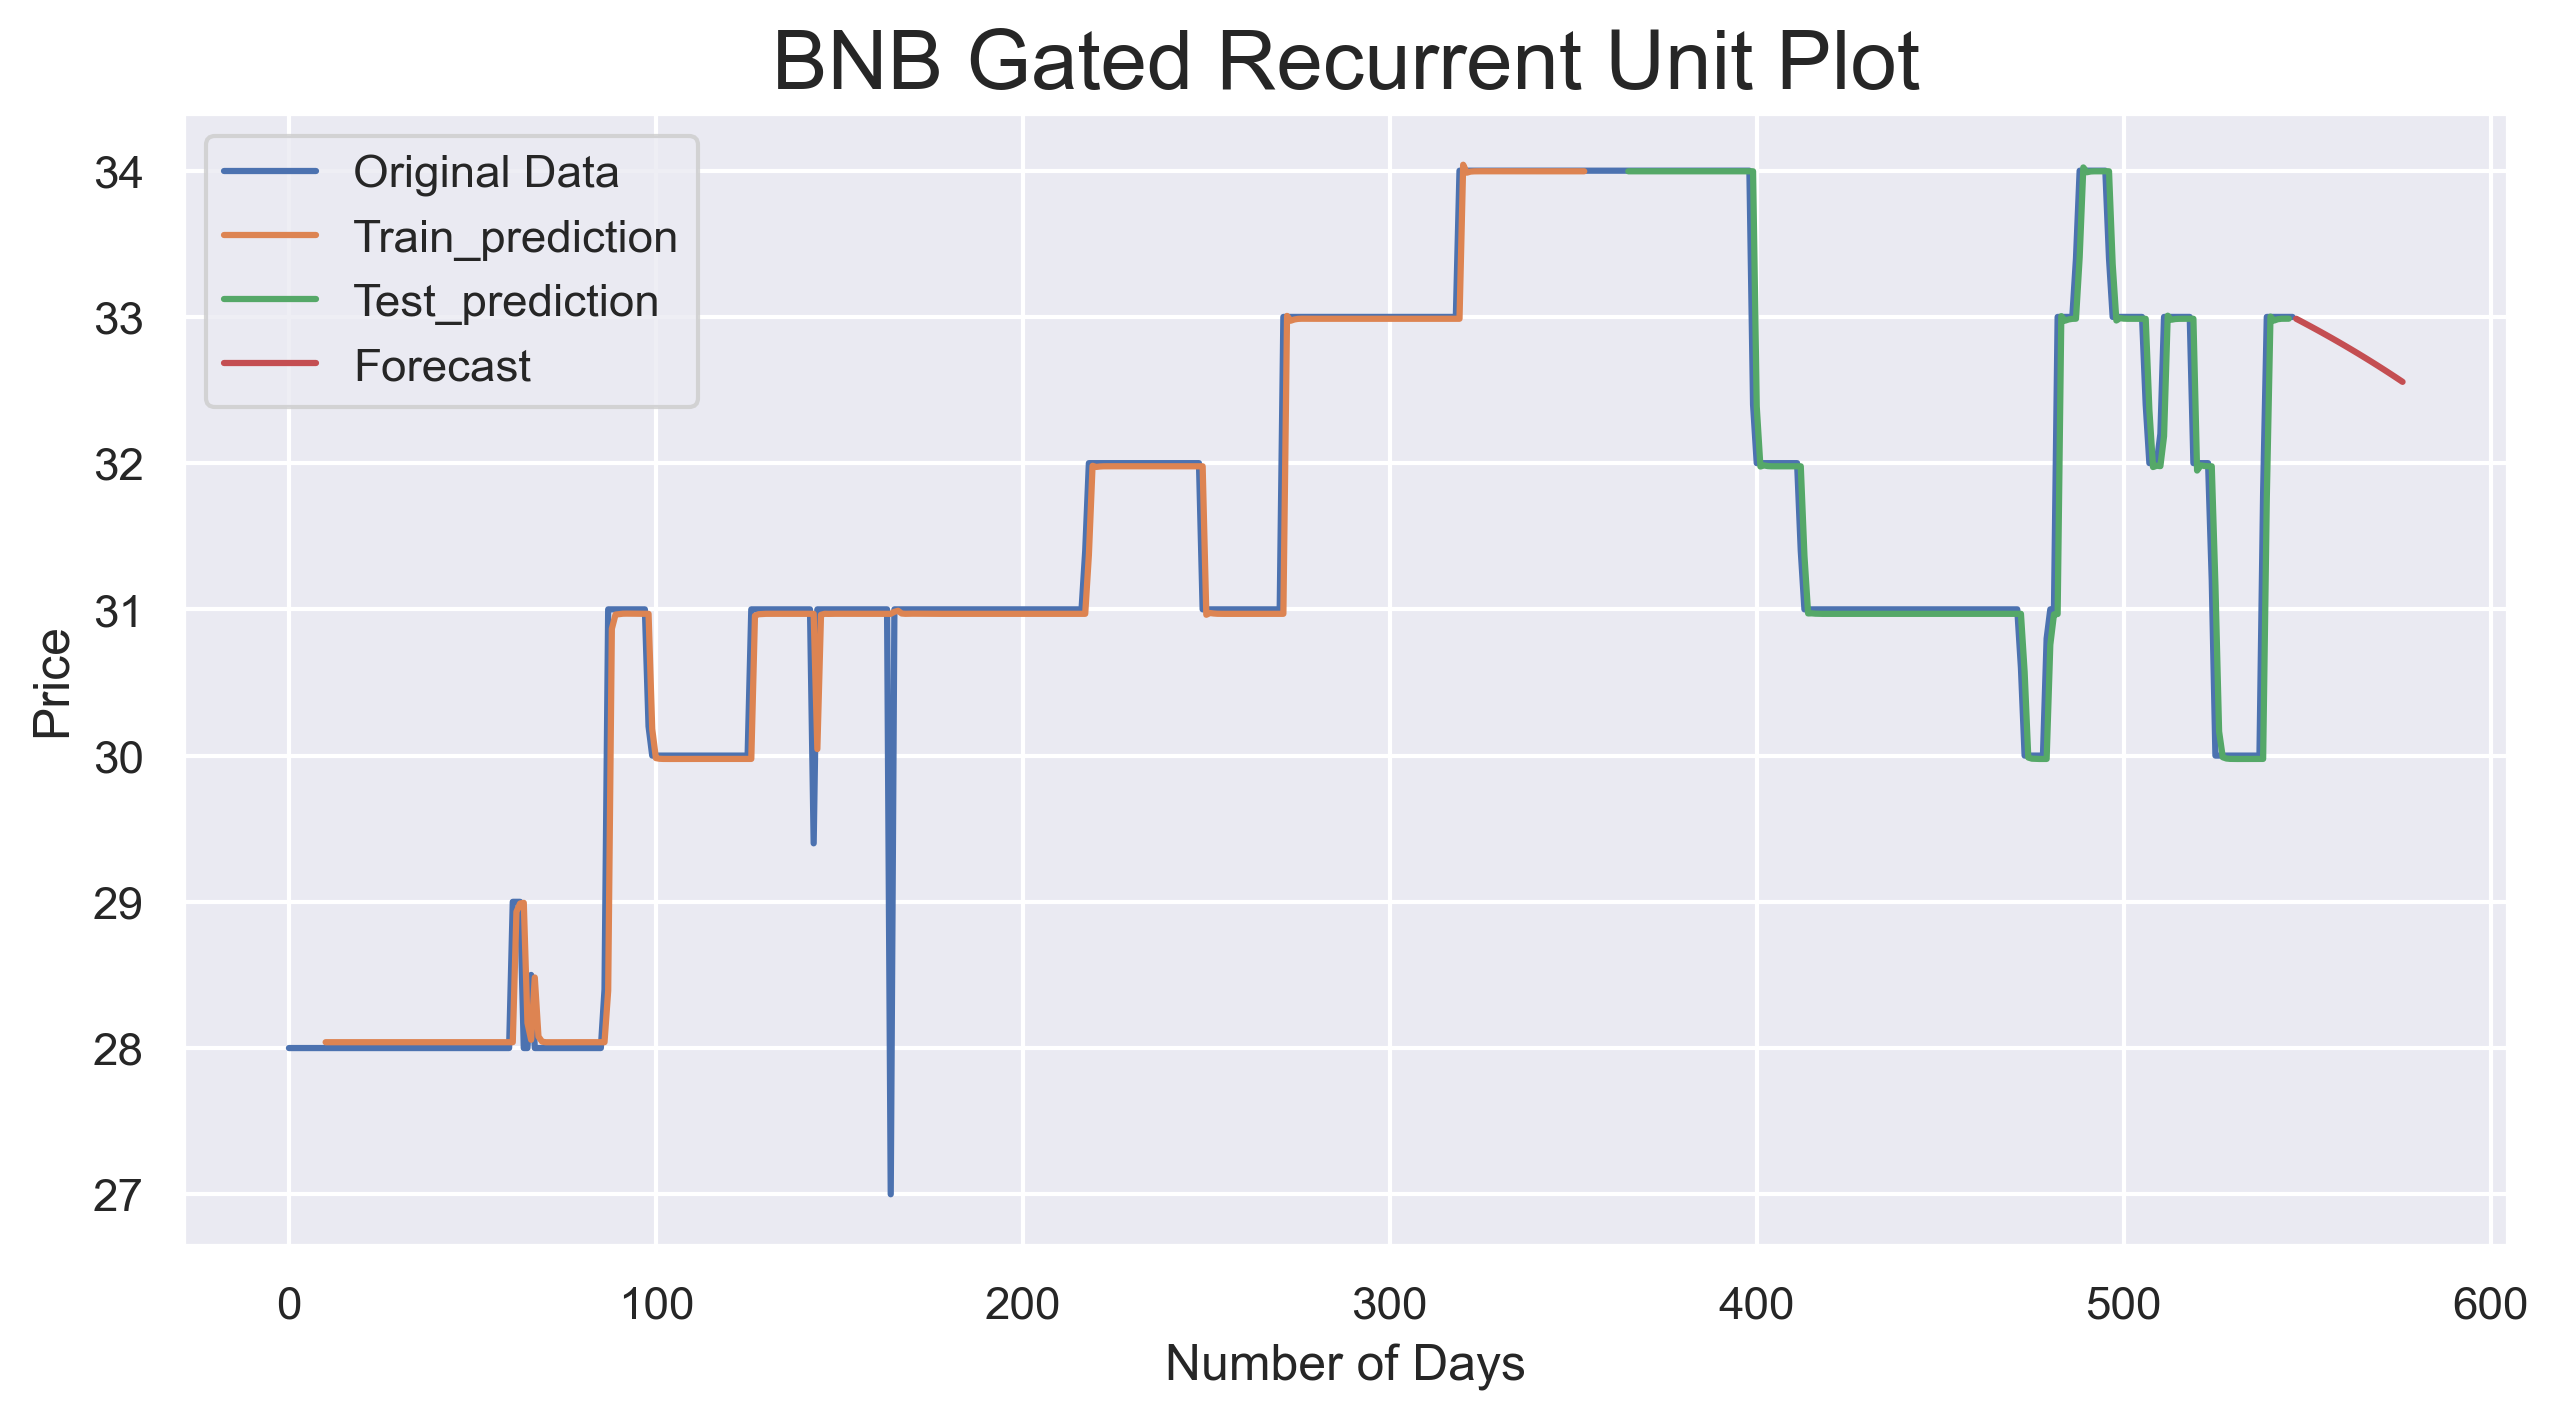

In [38]:
plt.figure(figsize=(10,5),dpi=300)
plt.plot(scaler.inverse_transform(data1), label='Original Data')
plt.plot(trainPredictPlot,label='Train_prediction')
plt.plot(testPredictPlot, label='Test_prediction')
plt.plot(day_pred,scaler.inverse_transform(lst_output), label='Forecast')
plt.title('BNB Gated Recurrent Unit Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Number of Days')
plt.legend()
plt.show()

In [39]:
forecast = forecast.to_csv('predictedData/bnb_gru_forecast.csv')

In [40]:
len(day_pred)

30

In [41]:
len(forecast_rescaled)

30

In [42]:
len(testPredictPlot)

547

In [43]:
np.count_nonzero(np.isnan(testPredictPlot))

366

In [44]:
#convert numpy array to DF
test = pd.DataFrame(testPredictPlot, columns = ['predicted_price'])
test.head

<bound method NDFrame.head of      predicted_price
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
..               ...
542        32.984398
543        32.987450
544        32.988029
545        32.987930
546              NaN

[547 rows x 1 columns]>

In [45]:
test.isnull().sum()

predicted_price    366
dtype: int64

In [46]:
test = test.dropna()
test

,predicted_price
365,33.995903
366,33.995903
367,33.995903
368,33.995903
369,33.995903
...,...
541,32.975513
542,32.984398
543,32.987450
544,32.988029


In [47]:
size = int(len(data) * 0.65)
size

355

In [48]:
#to know the date of test data
data.iloc[355+10:]  #10 for that time steps

,price
date,
2021-10-13,34.0
2021-10-14,34.0
2021-10-18,34.0
2021-10-19,34.0
2021-10-20,34.0
...,...
2022-07-08,33.0
2022-07-11,33.0
2022-07-12,33.0


In [49]:
test['date'] = pd.date_range(start='2021-10-15', periods=181, freq='D')
test

C:\Users\Asus\AppData\Local\Temp/ipykernel_16764/531574769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = pd.date_range(start='2021-10-15', periods=181, freq='D')


,predicted_price,date
365,33.995903,2021-10-15
366,33.995903,2021-10-16
367,33.995903,2021-10-17
368,33.995903,2021-10-18
369,33.995903,2021-10-19
...,...,...
541,32.975513,2022-04-09
542,32.984398,2022-04-10
543,32.987450,2022-04-11
544,32.988029,2022-04-12


In [50]:
col = ['date','predicted_price']
test = test[col]
test

,date,predicted_price
365,2021-10-15,33.995903
366,2021-10-16,33.995903
367,2021-10-17,33.995903
368,2021-10-18,33.995903
369,2021-10-19,33.995903
...,...,...
541,2022-04-09,32.975513
542,2022-04-10,32.984398
543,2022-04-11,32.987450
544,2022-04-12,32.988029


In [51]:
test = test.set_index('date')

In [52]:
test = test.to_csv('predictedData/bnb_gru_testPred.csv')